In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns

<h1> 1. Dataframe Bureau

In [2]:
df_bureau = pd.read_csv('home-credit-default-risk/bureau.csv')
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [3]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


Berikut adalah penjelasan singkat untuk setiap kolom pada dataframe bureau

1. <b>SK_ID_CURR:</b> ID unik untuk setiap pelanggan atau peminjam.
2. <b>SK_ID_BUREAU:</b> ID unik untuk setiap catatan kredit dalam database biro kredit.
3. <b>CREDIT_ACTIVE:</b> Status aktif kredit (misalnya, aktif, ditutup, atau lainnya).
4. <b>CREDIT_CURRENCY:</b> Mata uang yang digunakan dalam pinjaman atau kredit.
5. <b>DAYS_CREDIT:</b> Jumlah hari sejak kredit diberikan hingga tanggal referensi (biasanya tanggal analisis data).
6. <b>CREDIT_DAY_OVERDUE:</b> Jumlah hari kredit yang telah jatuh tempo (overdue).
7. <b>DAYS_CREDIT_ENDDATE:</b> Jumlah hari hingga kredit akan selesai atau berakhir.
8. <b>DAYS_ENDDATE_FACT:</b> Jumlah hari hingga tanggal akhir aktual dari kredit.
9. <b>AMT_CREDIT_MAX_OVERDUE:</b> Jumlah maksimum uang yang pernah jatuh tempo.
10. <b>CNT_CREDIT_PROLONG:</b> Jumlah perpanjangan yang dilakukan terhadap kredit.
11. <b>AMT_CREDIT_SUM:</b> Total jumlah kredit yang diberikan.
12. <b>AMT_CREDIT_SUM_DEBT:</b> Total jumlah utang yang belum dibayar dari kredit.
13. <b>AMT_CREDIT_SUM_LIMIT:</b> Total batas kredit (credit limit) yang tersedia.
14. <b>AMT_CREDIT_SUM_OVERDUE:</b> Total jumlah kredit yang saat ini jatuh tempo.
15. <b>CREDIT_TYPE:</b> Jenis kredit (misalnya, hipotek, pinjaman konsumen, atau lainnya).
16. <b>DAYS_CREDIT_UPDATE:</b> Jumlah hari sejak informasi kredit terakhir diperbarui.
17. <b>AMT_ANNUITY:</b> Jumlah cicilan tahunan untuk kredit tersebut.

In [4]:
df_bureau_cats = ['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']
df_bureau_nums = df_bureau.drop(columns=df_bureau_cats)

In [5]:
df_bureau_ca = df_bureau['CREDIT_ACTIVE'].value_counts()
df_t_bureau_ca = pd.DataFrame({
    "CREDIT_ACTIVE": df_bureau_ca.keys(),
    "Count": df_bureau_ca.values,
    "Percentage": (df_bureau_ca.values/sum(df_bureau_ca.values)*100)
})
round(df_t_bureau_ca,3)

,CREDIT_ACTIVE,Count,Percentage
0,Closed,1079273,62.879
1,Active,630607,36.739
2,Sold,6527,0.380
3,Bad debt,21,0.001


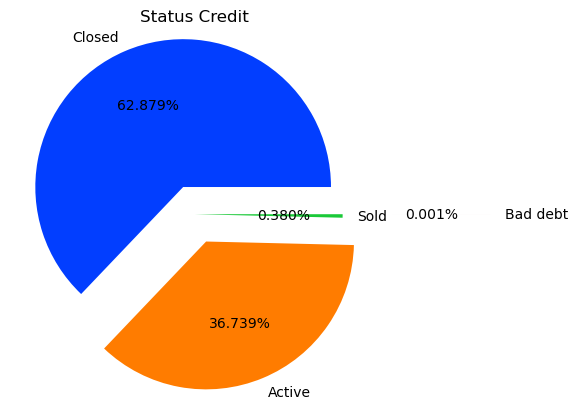

In [6]:
data = df_t_bureau_ca['Percentage']
keys_bureau_ca = df_t_bureau_ca['CREDIT_ACTIVE']
explode = [0.2, 0.2, 0, 1]
palette_color = sns.color_palette('bright') 
plt.pie(data, labels=keys_bureau_ca, colors=palette_color, 
		explode=explode, autopct='%.3f%%') 
plt.title('Status Credit')
plt.show() 

Kolom **CREDIT_ACTIVE** di atas mencatat status atau kondisi aktif dari berbagai akun kredit atau pinjaman. Berikut adalah deskripsi untuk setiap statusnya:

1. **Closed**:  
   Mengindikasikan akun kredit yang telah ditutup. Ini bisa berarti pinjaman telah lunas atau kredit dihentikan atas permintaan atau keputusan tertentu. Jumlahnya adalah **1.079.273** atau **62,8%**.

2. **Active**:  
   Merujuk pada akun kredit yang masih aktif digunakan oleh pelanggan. Artinya, pembayaran masih berlangsung atau fasilitas kredit masih dapat digunakan. Jumlahnya adalah **630.607** atau **36,7%**.

3. **Sold**:  
   Menandakan akun kredit yang telah dijual, kemungkinan kepada pihak ketiga, seperti perusahaan penagihan utang (debt collection agency). Jumlahnya adalah **6.527** atau **0,3%**.

4. **Bad debt**:  
   Mengacu pada akun kredit yang dianggap sebagai utang macet, di mana pembayarannya tidak lagi diharapkan karena debitur gagal memenuhi kewajibannya. Jumlahnya adalah **21** atau **0,001%**.

In [7]:
df_t_bureau_cc = df_bureau['CREDIT_CURRENCY'].value_counts()
df_t_bureau_cc = pd.DataFrame({
    "CREDIT_CURRENCY": df_t_bureau_cc.keys(),
    "Count": df_t_bureau_cc.values,
    "Percentage": (df_t_bureau_cc.values/sum(df_t_bureau_cc.values)*100)
})
round(df_t_bureau_cc,3)

,CREDIT_CURRENCY,Count,Percentage
0,currency 1,1715020,99.918
1,currency 2,1224,0.071
2,currency 3,174,0.010
3,currency 4,10,0.001


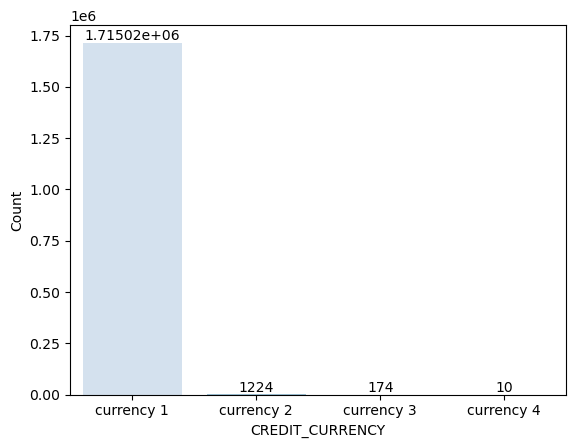

In [8]:
ax = sns.barplot(x = df_t_bureau_cc['CREDIT_CURRENCY'],
			y = df_t_bureau_cc['Count'],
			data = df_t_bureau_cc,
			palette = "Blues")
ax.bar_label(ax.containers[0])
plt.show()


Kolom **CREDIT_CURRENCY** mencatat jenis mata uang yang digunakan untuk akun kredit atau pinjaman. Berikut adalah deskripsi untuk setiap nilai yang muncul dalam kolom ini:

1. **currency 1**:  
   Menunjukkan mayoritas akun kredit (jumlah **1.715.020**) menggunakan mata uang ini. Kemungkinan besar, ini adalah mata uang utama yang berlaku di wilayah tersebut (misalnya, Rupiah di Indonesia, Dolar di AS, dll.).

2. **currency 2**:  
   Mengacu pada akun kredit (jumlah **1.224**) yang menggunakan mata uang kedua. Ini bisa jadi mata uang asing yang digunakan dalam sebagian kecil transaksi atau pinjaman.

3. **currency 3**:  
   Menandakan akun kredit (jumlah **174**) yang menggunakan mata uang ketiga. Jumlahnya sangat kecil dibandingkan dengan **currency 1**, menunjukkan bahwa penggunaannya jarang.

4. **currency 4**:  
   Mencerminkan akun kredit (jumlah **10**) yang menggunakan mata uang keempat. Jumlahnya sangat kecil, menunjukkan bahwa ini adalah kasus yang sangat jarang atau bersifat khusus.

In [9]:
df_t_bureau_ct = df_bureau['CREDIT_TYPE'].value_counts()
df_t_bureau_ct = pd.DataFrame({
    "CREDIT_TYPE": df_t_bureau_ct.keys(),
    "Count": df_t_bureau_ct.values,
    "Percentage": (df_t_bureau_ct.values/sum(df_t_bureau_ct.values)*100)
})
round(df_t_bureau_ct,3)

,CREDIT_TYPE,Count,Percentage
0,Consumer credit,1251615,72.920
1,Credit card,402195,23.432
2,Car loan,27690,1.613
3,Mortgage,18391,1.071
4,Microloan,12413,0.723
5,Loan for business development,1975,0.115
6,Another type of loan,1017,0.059
7,Unknown type of loan,555,0.032
8,Loan for working capital replenishment,469,0.027
9,Cash loan (non-earmarked),56,0.003


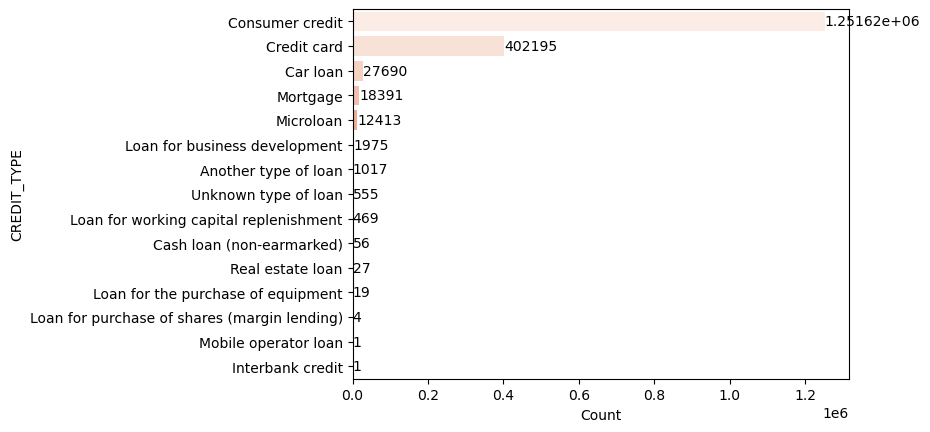

In [10]:
ax2 = sns.barplot(x = df_t_bureau_ct['Count'], y = df_t_bureau_ct['CREDIT_TYPE'], data = df_t_bureau_ct,
                  palette = "Reds")
ax2.bar_label(ax2.containers[0])
plt.show()


Kolom **CREDIT_TYPE** mencatat jenis atau kategori pinjaman/kredit yang diberikan kepada pelanggan. Berikut adalah penjelasan untuk setiap jenis pinjaman beserta jumlahnya:

1. **Consumer credit** (1.251.615):  
   Pinjaman untuk kebutuhan konsumen, seperti pembelian barang atau jasa untuk penggunaan pribadi. Ini adalah jenis kredit yang paling umum dalam dataset.

2. **Credit card** (402.195):  
   Akun kredit berbasis kartu kredit, memungkinkan pelanggan untuk melakukan pembayaran menggunakan batas kredit yang ditentukan.

3. **Car loan** (27.690):  
   Pinjaman khusus untuk pembelian kendaraan bermotor, seperti mobil atau sepeda motor.

4. **Mortgage** (18.391):  
   Kredit pemilikan rumah atau hipotek, digunakan untuk membeli atau membangun properti.

5. **Microloan** (12.413):  
   Pinjaman dengan nilai kecil, biasanya diberikan kepada individu atau usaha kecil yang membutuhkan modal kerja.

6. **Loan for business development** (1.975):  
   Pinjaman untuk pengembangan usaha, seperti ekspansi bisnis, investasi dalam peralatan baru, atau infrastruktur.

7. **Another type of loan** (1.017):  
   Kategori pinjaman lainnya yang tidak termasuk dalam kategori yang telah disebutkan.

8. **Unknown type of loan** (555):  
   Pinjaman dengan jenis yang tidak diketahui atau tidak ditentukan dalam data.

9. **Loan for working capital replenishment** (469):  
   Pinjaman untuk menambah modal kerja, digunakan untuk operasional sehari-hari bisnis.

10. **Cash loan (non-earmarked)** (56):  
    Pinjaman uang tunai yang tidak ditentukan penggunaannya, memberikan fleksibilitas kepada peminjam untuk menggunakannya sesuai kebutuhan.

11. **Real estate loan** (27):  
    Pinjaman yang berkaitan dengan properti selain rumah, seperti tanah atau gedung komersial.

12. **Loan for the purchase of equipment** (19):  
    Pinjaman untuk membeli peralatan, biasanya untuk bisnis atau keperluan profesional.

13. **Loan for purchase of shares (margin lending)** (4):  
    Pinjaman untuk membeli saham, biasanya melibatkan margin lending di mana saham digunakan sebagai jaminan.

14. **Mobile operator loan** (1):  
    Pinjaman mikro yang diberikan oleh operator seluler, mungkin untuk pembelian pulsa atau paket data.

15. **Interbank credit** (1):  
    Kredit antarbank, biasanya dalam bentuk pinjaman jangka pendek antar lembaga keuangan.

In [11]:
round(df_bureau_nums.describe(),2)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1716428.00,1716428.00,1716428.00,1716428.00,1610875.00,1082775.00,5.919400e+05,1716428.00,1.716415e+06,1.458759e+06,1124648.00,1716428.00,1716428.00,4.896370e+05
mean,278214.93,5924434.49,-1142.11,0.82,510.52,-1017.44,3.825420e+03,0.01,3.549946e+05,1.370851e+05,6229.51,37.91,-593.75,1.571276e+04
std,102938.56,532265.73,795.16,36.54,4994.22,714.01,2.060316e+05,0.10,1.149811e+06,6.774011e+05,45032.03,5937.65,720.75,3.258270e+05
min,100001.00,5000000.00,-2922.00,0.00,-42060.00,-42023.00,0.000000e+00,0.00,0.000000e+00,-4.705600e+06,-586406.12,0.00,-41947.00,0.000000e+00
25%,188866.75,5463953.75,-1666.00,0.00,-1138.00,-1489.00,0.000000e+00,0.00,5.130000e+04,0.000000e+00,0.00,0.00,-908.00,0.000000e+00
50%,278055.00,5926303.50,-987.00,0.00,-330.00,-897.00,0.000000e+00,0.00,1.255185e+05,0.000000e+00,0.00,0.00,-395.00,0.000000e+00
75%,367426.00,6385681.25,-474.00,0.00,474.00,-425.00,0.000000e+00,0.00,3.150000e+05,4.015350e+04,0.00,0.00,-33.00,1.350000e+04
max,456255.00,6843457.00,0.00,2792.00,31199.00,0.00,1.159872e+08,9.00,5.850000e+08,1.701000e+08,4705600.32,3756681.00,372.00,1.184534e+08


<h1> 2. Dataframe Bureau Balance

In [12]:
df_bureau_balance = pd.read_csv('home-credit-default-risk/bureau_balance.csv')
df_bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [13]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [14]:
df_bureau_balance_cats = ['MONTHS_BALANCE','STATUS']

In [15]:
df_bb = df_bureau_balance['STATUS'].value_counts()
df_t_bb = pd.DataFrame({
    "MONTHS_BALANCE": df_bb.keys(),
    "Count": df_bb.values,
    "Percentage": (df_bb.values/sum(df_bb.values)*100)
})
round(df_t_bb,3)

,MONTHS_BALANCE,Count,Percentage
0,C,13646993,49.989
1,0,7499507,27.471
2,X,5810482,21.284
3,1,242347,0.888
4,5,62406,0.229
5,2,23419,0.086
6,3,8924,0.033
7,4,5847,0.021


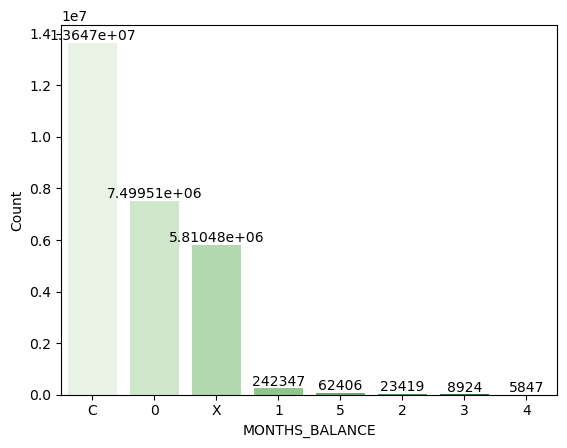

In [17]:
ax = sns.barplot(x='MONTHS_BALANCE', y='Count', data=df_t_bb, palette="Greens")
ax.bar_label(ax.containers[0])
plt.show()

Dalam analisis kredit pinjaman, berikut beberapa penjelasan mengenai kode-kode diatas
  - `C`: Kredit selesai dibayar (closed).
  - `0`: Tidak ada keterlambatan pembayaran.
  - `X`: Tidak aktif (misalnya, pinjaman tidak pernah diambil atau sudah kadaluarsa).
  - `1`-`5`: Tingkat keterlambatan pembayaran, di mana angka yang lebih tinggi menunjukkan keterlambatan lebih lama.

Jumlah terbesar adalah status `C` (closed), menunjukkan bahwa sebagian besar pinjaman telah selesai dibayar. Sedangkan angka `1` hingga `5` menunjukkan ada sebagian kecil keterlambatan pembayaran.

Jika konteksnya berbeda, beri tahu saya agar saya bisa memberikan interpretasi yang lebih spesifik! 😊

<h1> 3. Dataframe Credit Card Balance

In [18]:
df_credit_card_balance = pd.read_csv('home-credit-default-risk/credit_card_balance.csv')
df_credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [19]:
df_credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [20]:
df_ccb_cats = ['NAME_CONTRACT_STATUS']
df_ccb_nums = df_credit_card_balance.drop(columns=df_ccb_cats)

In [22]:
df_cbb = df_credit_card_balance['NAME_CONTRACT_STATUS'].value_counts()
df_t_cbb = pd.DataFrame({
    "NAME_CONTRACT_STATUS": df_cbb.keys(),
    "Count": df_cbb.values,
    "Percentage": (df_cbb.values/sum(df_cbb.values)*100)
})
df_t_cbb

,NAME_CONTRACT_STATUS,Count,Percentage
0,Active,3698436,96.305613
1,Completed,128918,3.356967
2,Signed,11058,0.287945
3,Demand,1365,0.035544
4,Sent proposal,513,0.013358
5,Refused,17,0.000443
6,Approved,5,0.000130


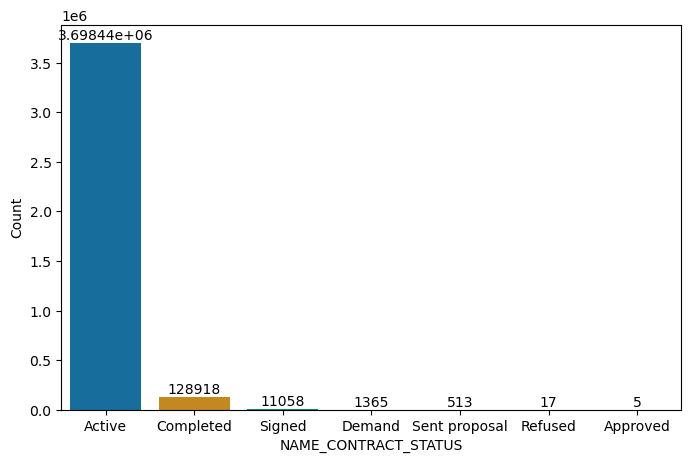

In [23]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='NAME_CONTRACT_STATUS', y='Count', data=df_t_cbb, palette="colorblind")
ax.bar_label(ax.containers[0])
plt.show()

### **Analisis Kredit**

- **`Active` (3,698,436)**: Sebagian besar kontrak kredit masih aktif, yang berarti banyak pinjaman yang belum dibayar lunas.
- **`Completed` (128,918)**: Sebagian kecil pinjaman telah selesai, yang menandakan bahwa ada sejumlah peminjam yang telah melunasi pinjaman mereka.
- **`Signed` (11,058)**: Ada sejumlah pinjaman yang baru ditandatangani, tetapi belum dimulai, yang menunjukkan adanya kontrak yang sedang dalam tahap awal.
- **Status lainnya (`Demand`, `Sent proposal`, `Refused`, `Approved`)**: Sebagian kecil kontrak kredit berada dalam tahap aplikasi, pengajuan proposal, atau telah ditolak, yang menunjukkan bahwa beberapa aplikasi sedang dalam tahap evaluasi.

In [24]:
round(df_ccb_nums.describe(), 2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3090496.00,3840312.00,3090496.00,3090496.00,3535076.00,...,3840312.00,3840312.00,3840312.00,3090496.00,3840312.00,3090496.00,3090496.00,3535076.00,3840312.00,3840312.00
mean,1904503.59,278324.21,-34.52,58300.16,153807.96,5961.32,7433.39,288.17,2968.80,3540.20,...,55965.88,58088.81,58098.29,0.31,0.70,0.00,0.56,20.83,9.28,0.33
std,536469.47,102704.48,26.67,106307.03,165145.70,28225.69,33846.08,8201.99,20796.89,5600.15,...,102533.62,105965.37,105971.80,1.10,3.19,0.08,3.24,20.05,97.52,21.48
min,1000018.00,100006.00,-96.00,-420250.18,0.00,-6827.31,-6211.62,0.00,0.00,0.00,...,-423305.82,-420250.18,-420250.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1434385.00,189517.00,-55.00,0.00,45000.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00
50%,1897122.00,278396.00,-28.00,0.00,112500.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,0.00
75%,2369327.75,367580.00,-11.00,89046.69,180000.00,0.00,0.00,0.00,0.00,6633.91,...,85359.24,88899.49,88914.51,0.00,0.00,0.00,0.00,32.00,0.00,0.00
max,2843496.00,456250.00,-1.00,1505902.18,1350000.00,2115000.00,2287098.32,1529847.00,2239274.16,202882.00,...,1472316.80,1493338.18,1493338.18,51.00,165.00,12.00,165.00,120.00,3260.00,3260.00


<h1> 4. Dataframe Installments Payments

In [25]:
df_installments_payments = pd.read_csv('home-credit-default-risk/installments_payments.csv')
df_installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [26]:
df_installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [27]:
round(df_installments_payments.describe(), 2)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,13605401.00,13605401.00,13605401.00,13605401.00,13605401.00,13602496.00,13605401.00,13602496.00
mean,1903364.97,278444.88,0.86,18.87,-1042.27,-1051.11,17050.91,17238.22
std,536202.91,102718.31,1.04,26.66,800.95,800.59,50570.25,54735.78
min,1000001.00,100001.00,0.00,1.00,-2922.00,-4921.00,0.00,0.00
25%,1434191.00,189639.00,0.00,4.00,-1654.00,-1662.00,4226.08,3398.26
50%,1896520.00,278685.00,1.00,8.00,-818.00,-827.00,8884.08,8125.52
75%,2369094.00,367530.00,1.00,19.00,-361.00,-370.00,16710.21,16108.42
max,2843499.00,456255.00,178.00,277.00,-1.00,-1.00,3771487.84,3771487.84


<h1> 5. Dataframe Cash Balance

In [28]:
df_cash_balance = pd.read_csv('home-credit-default-risk/POS_CASH_balance.csv')
df_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [29]:
df_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [30]:
df_cb_cats = ['NAME_CONTRACT_STATUS']
df_cb_nums = df_cash_balance.drop(columns=df_cb_cats)

In [32]:
df_cb = df_cash_balance['NAME_CONTRACT_STATUS'].value_counts()
df_t_cb = pd.DataFrame({
    "NAME_CONTRACT_STATUS": df_cb.keys(),
    "Count": df_cb.values,
    "Percentage": (df_cb.values/sum(df_cb.values)*100)
})
df_t_cb

,NAME_CONTRACT_STATUS,Count,Percentage
0,Active,9151119,91.498764
1,Completed,744883,7.447819
2,Signed,87260,0.872482
3,Demand,7065,0.070640
4,Returned to the store,5461,0.054603
5,Approved,4917,0.049163
6,Amortized debt,636,0.006359
7,Canceled,15,0.000150
8,XNA,2,0.000020


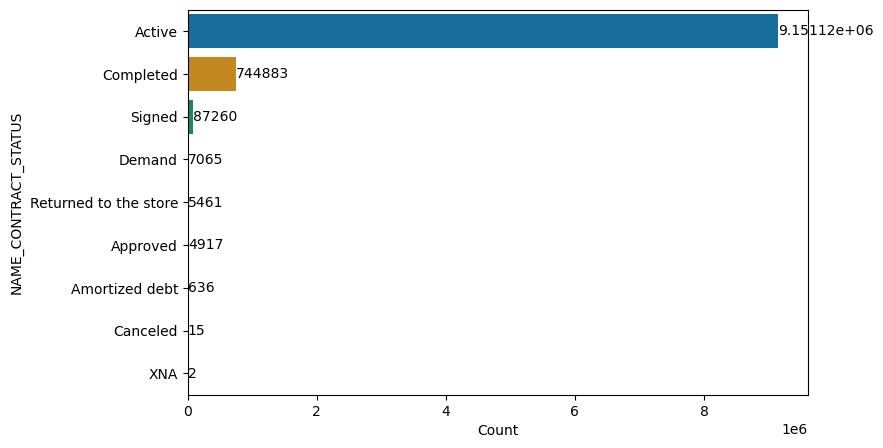

In [33]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Count', y='NAME_CONTRACT_STATUS', data=df_t_cb, palette="colorblind")
ax.bar_label(ax.containers[0])
plt.show()

### **Analisis Berdasarkan Data**

1. **Pinjaman Aktif (Active - 9,151,119)**: Jumlah pinjaman aktif sangat besar, yang berarti sebagian besar pinjaman dalam dataset ini masih dalam proses dan belum selesai dibayar.
2. **Pinjaman Selesai (Completed - 744,883)**: Sebagian kecil pinjaman telah diselesaikan atau lunas.
3. **Status Proses (Demand, Signed, Approved)**: Ada sejumlah aplikasi kredit yang sedang diproses, baru ditandatangani, atau baru saja disetujui, tetapi belum dimulai atau selesai.
4. **Pengembalian Barang (Returned to the store - 5,461)**: Beberapa kontrak terkait dengan pengembalian barang atau produk yang telah dibeli dengan kredit.
5. **Pembayaran Utang (Amortized debt - 636)**: Ada sebagian kecil pinjaman yang sedang dalam proses amortisasi, yang menunjukkan pelunasan utang secara bertahap.
6. **Pinjaman Dibatalkan (Canceled - 15)**: Pinjaman yang dibatalkan sangat sedikit, menunjukkan bahwa sebagian besar aplikasi yang masuk tetap berjalan.
7. **Data Tidak Tersedia (XNA - 2)**: Hanya dua kasus yang statusnya tidak tersedia atau tidak dapat dikategorikan.

In [34]:
round(df_cash_balance.describe(), 2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,10001358.00,10001358.00,10001358.00,9975287.00,9975271.00,10001358.00,10001358.00
mean,1903216.60,278403.86,-35.01,17.09,10.48,11.61,0.65
std,535846.53,102763.75,26.07,12.00,11.11,132.71,32.76
min,1000001.00,100001.00,-96.00,1.00,0.00,0.00,0.00
25%,1434405.00,189550.00,-54.00,10.00,3.00,0.00,0.00
50%,1896565.00,278654.00,-28.00,12.00,7.00,0.00,0.00
75%,2368963.00,367429.00,-13.00,24.00,14.00,0.00,0.00
max,2843499.00,456255.00,-1.00,92.00,85.00,4231.00,3595.00


<h1> 6. Datafraame Cash Balance

In [35]:
df_previous_application = pd.read_csv('home-credit-default-risk/previous_application.csv')
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [37]:
df_pa_cats = ['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE',
             'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_CLIENT_TYPE',
             'NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY',
             'NAME_YIELD_GROUP','PRODUCT_COMBINATION']
df_pa_nums = df_previous_application.drop(columns=df_pa_cats)

In [39]:
df_pa_nct = df_previous_application['NAME_CONTRACT_TYPE'].value_counts()
df_t_pa_nct = pd.DataFrame({
    "NAME_CONTRACT_STATUS": df_pa_nct.keys(),
    "Count": df_pa_nct.values,
    "Percentage": (df_pa_nct.values/sum(df_pa_nct.values)*100).round(2)
})
df_t_pa_nct

,NAME_CONTRACT_STATUS,Count,Percentage
0,Cash loans,747553,44.76
1,Consumer loans,729151,43.66
2,Revolving loans,193164,11.57
3,XNA,346,0.02


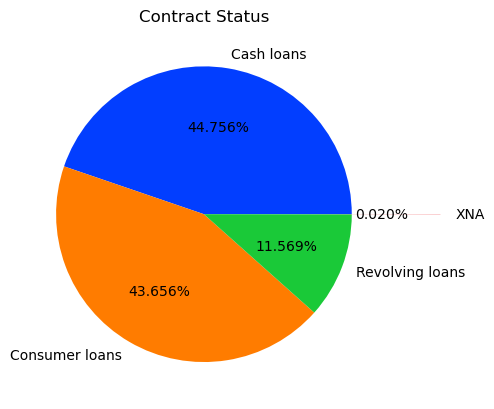

In [40]:
data = df_t_pa_nct['Percentage']
keys = df_t_pa_nct['NAME_CONTRACT_STATUS']
explode = [0, 0, 0, 0.6]
palette_color = sns.color_palette('bright') 
plt.pie(data, labels=keys, colors=palette_color, 
		explode=explode, autopct='%.3f%%') 
plt.title('Contract Status')
plt.show() 

### **Analisis Berdasarkan Data**
1. **Pinjaman Tunai (Cash loans - 747,553)**: Pinjaman tunai adalah jenis yang paling umum, yang bisa menunjukkan bahwa banyak peminjam yang memilih pinjaman langsung untuk kebutuhan darurat atau pembelian barang secara umum.
   
2. **Pinjaman Konsumtif (Consumer loans - 729,151)**: Jenis pinjaman yang kedua paling banyak digunakan, yang mungkin menunjukkan bahwa banyak orang mengambil pinjaman untuk keperluan pribadi atau pembelian barang.
   
3. **Pinjaman Revolving (Revolving loans - 193,164)**: Meskipun jumlahnya lebih kecil, pinjaman revolving seperti kartu kredit atau limit kredit menunjukkan fleksibilitas dalam penggunaan dana, tetapi jumlahnya lebih terbatas dibandingkan pinjaman tunai dan konsumtif.

4. **Data Tidak Tersedia (XNA - 346)**: Hanya sejumlah kecil pinjaman yang memiliki status **XNA**, yang berarti ada beberapa data yang tidak dapat dikategorikan dengan jelas atau hilang.

In [41]:
df_pa_week = df_previous_application['WEEKDAY_APPR_PROCESS_START'].value_counts()
df_t_pa_week = pd.DataFrame({
    "WEEKDAY_APPR_PROCESS_START": df_pa_week.keys(),
    "Count": df_pa_week.values
})
order = ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"]
df_t_pa_week['WEEKDAY_APPR_PROCESS_START'] = pd.Categorical(
    df_t_pa_week['WEEKDAY_APPR_PROCESS_START'], 
    categories=order, 
    ordered=True
)
df_t_pa_week = df_t_pa_week.sort_values('WEEKDAY_APPR_PROCESS_START')
df_t_pa_week

,WEEKDAY_APPR_PROCESS_START,Count
2,MONDAY,253557
0,TUESDAY,255118
1,WEDNESDAY,255010
4,THURSDAY,249099
3,FRIDAY,252048
5,SATURDAY,240631
6,SUNDAY,164751


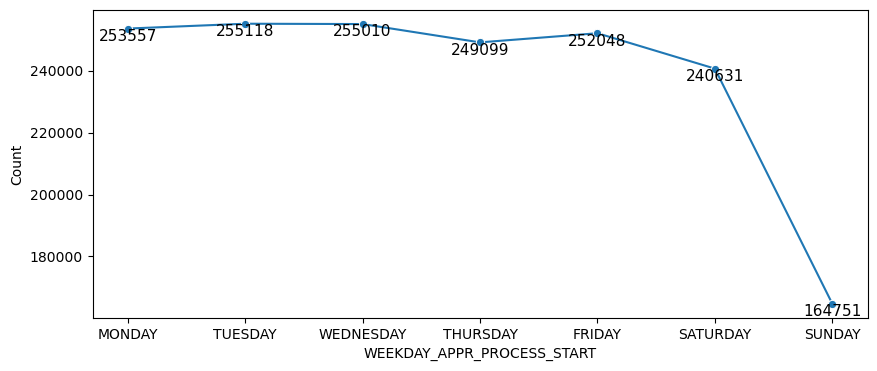

In [43]:
plt.figure(figsize=(10, 4))
sns.lineplot(x="WEEKDAY_APPR_PROCESS_START", y="Count", data=df_t_pa_week, marker='o')
for i, row in df_t_pa_week.iterrows():
    plt.text(x=row["WEEKDAY_APPR_PROCESS_START"], y=row["Count"] + 0.5, 
             s=str(row["Count"]), ha='center', va='top', fontsize=11)
plt.show()

### **Analisis Berdasarkan Data**

1. **Proses Aplikasi yang Lebih Banyak di Awal dan Tengah Minggu (Senin - Rabu)**: Data menunjukkan bahwa lembaga keuangan memproses lebih banyak aplikasi pada awal minggu, terutama pada hari **Selasa** dan **Rabu**. Ini mungkin karena aplikasi yang masuk pada akhir pekan diproses lebih awal pada awal minggu.
   
2. **Penurunan Proses Aplikasi di Akhir Minggu (Kamis - Minggu)**: Terdapat penurunan jumlah aplikasi yang diproses menjelang akhir minggu. **Kamis** masih cukup sibuk, tetapi jumlah aplikasi menurun pada **Jumat**, **Sabtu**, dan terutama **Minggu**.

3. **Faktor Operasional**: Penurunan jumlah aplikasi yang diproses pada **Sabtu** dan **Minggu** mungkin disebabkan oleh jam operasional lembaga keuangan yang lebih terbatas atau tidak ada pemrosesan aplikasi pada akhir pekan.

In [47]:
df_pa_apps = df_previous_application['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()
df_t_pa_apps = pd.DataFrame({
    "FLAG_LAST_APPL_PER_CONTRACT": df_pa_apps.keys(),
    "Count": df_pa_apps.values,
    "Percentage": (df_pa_apps.values/sum(df_pa_apps.values)*100).round(2)
})
df_t_pa_apps

,FLAG_LAST_APPL_PER_CONTRACT,Count,Percentage
0,Y,1661739,99.49
1,N,8475,0.51


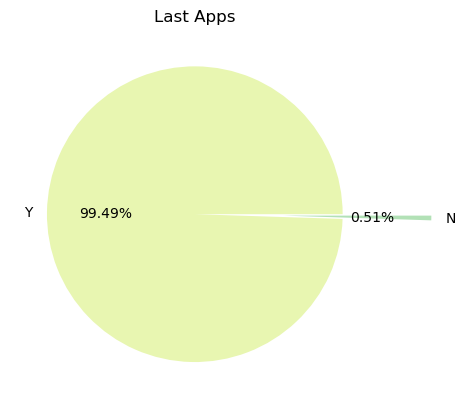

In [54]:
data = df_t_pa_apps['Percentage']
keys = df_t_pa_apps['FLAG_LAST_APPL_PER_CONTRACT']
explode = [0, 0.6]
palette_color = sns.color_palette('YlGnBu') 
plt.pie(data, labels=keys, colors=palette_color, 
		explode=explode, autopct='%.2f%%') 
plt.title('Last Apps')
plt.show() 

### **Analisis Berdasarkan Data**

- **Aplikasi Terakhir (Y - 1,661,739)**: Sebagian besar aplikasi dalam dataset ini adalah aplikasi terakhir dalam kontrak. Ini menunjukkan bahwa peminjam lebih banyak mengajukan aplikasi terakhir untuk menyelesaikan kontrak atau pinjaman, yang mengindikasikan akhir dari proses pinjaman atau kredit.
  
- **Aplikasi Bukan Terakhir (N - 8,475)**: Hanya sebagian kecil aplikasi yang bukan yang terakhir diajukan dalam kontrak, yang bisa menunjukkan bahwa beberapa peminjam mengajukan beberapa aplikasi dalam satu kontrak sebelum mencapai aplikasi terakhir.

In [56]:
df_pa_loan_purpose = df_previous_application['NAME_CASH_LOAN_PURPOSE'].value_counts()
df_t_pa_loan_purpose = pd.DataFrame({
    "NAME_CASH_LOAN_PURPOSE": df_pa_loan_purpose.keys(),
    "Count": df_pa_loan_purpose.values,
    "Percentage": (df_pa_loan_purpose.values/sum(df_pa_loan_purpose.values)*100).round(2)
})
df_t_pa_loan_purpose

,NAME_CASH_LOAN_PURPOSE,Count,Percentage
0,XAP,922661,55.24
1,XNA,677918,40.59
2,Repairs,23765,1.42
3,Other,15608,0.93
4,Urgent needs,8412,0.50
5,Buying a used car,2888,0.17
6,Building a house or an annex,2693,0.16
7,Everyday expenses,2416,0.14
8,Medicine,2174,0.13
9,Payments on other loans,1931,0.12


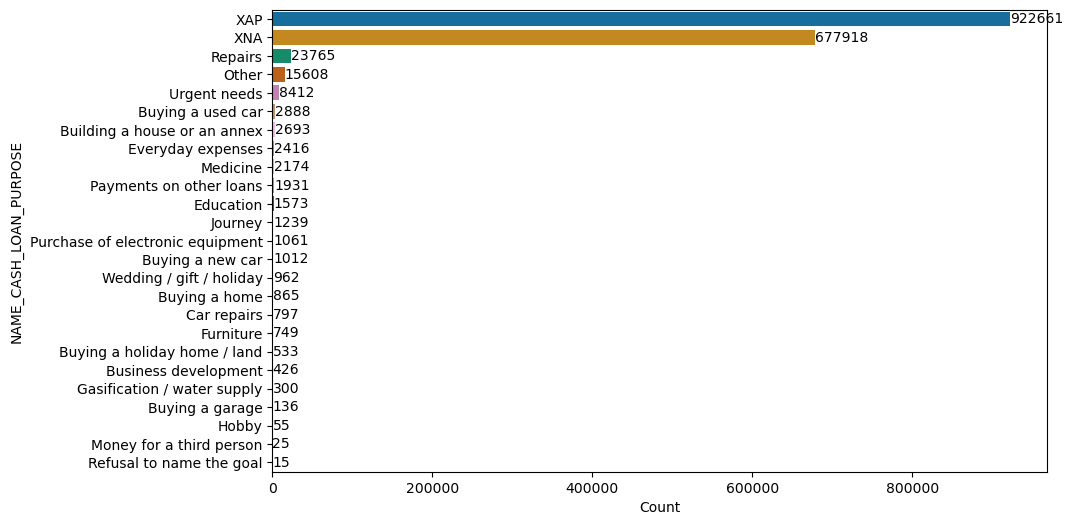

In [58]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='NAME_CASH_LOAN_PURPOSE', data=df_t_pa_loan_purpose, palette="colorblind")
ax.bar_label(ax.containers[0])
plt.show()

### **Penjelasan Tujuan Penggunaan Pinjaman Tunai**

1. **XAP (922,661)**  
   - **XAP** biasanya merupakan kategori yang tidak terdefinisi atau data yang tidak lengkap dalam sistem. 
   - Jumlah **922,661** menunjukkan banyaknya aplikasi pinjaman yang tujuannya tidak tercatat dengan jelas, atau belum diidentifikasi. 
   - Ini bisa terjadi jika peminjam tidak memberikan informasi tujuan pinjaman atau jika data tidak tersedia.

2. **XNA (677,918)**  
   - **XNA** biasanya berarti **"Not Available"** atau "Tidak Tersedia," yang menunjukkan bahwa tujuan pinjaman tidak tercatat atau tidak tersedia dalam sistem.
   - Jumlah **677,918** menunjukkan banyaknya aplikasi pinjaman yang tidak memiliki tujuan yang terdefinisi atau jelas.

3. **Repairs (23,765)**  
   - **Repairs** menunjukkan pinjaman yang diajukan untuk tujuan **perbaikan**. Ini bisa termasuk perbaikan rumah, kendaraan, atau barang lain.
   - Jumlah **23,765** menunjukkan banyaknya aplikasi pinjaman untuk perbaikan.

4. **Other (15,608)**  
   - **Other** merujuk pada pinjaman yang tujuannya adalah untuk **keperluan lain** yang tidak termasuk dalam kategori yang sudah disebutkan.
   - Jumlah **15,608** menunjukkan aplikasi pinjaman untuk keperluan yang tidak teridentifikasi secara spesifik.

5. **Urgent needs (8,412)**  
   - **Urgent needs** mengacu pada pinjaman yang diajukan untuk memenuhi **kebutuhan mendesak** atau keadaan darurat.
   - Jumlah **8,412** menunjukkan banyaknya aplikasi yang diajukan untuk kebutuhan yang memerlukan perhatian segera.

6. **Buying a used car (2,888)**  
   - **Buying a used car** berarti pinjaman diajukan untuk **membeli mobil bekas**.
   - Jumlah **2,888** menunjukkan banyaknya aplikasi pinjaman yang tujuannya adalah membeli mobil bekas.

7. **Building a house or an annex (2,693)**  
   - **Building a house or an annex** berarti pinjaman digunakan untuk **membangun rumah atau tambahan** (misalnya, membangun rumah baru atau memperluas rumah yang sudah ada).
   - Jumlah **2,693** menunjukkan aplikasi pinjaman yang diajukan untuk tujuan ini.

8. **Everyday expenses (2,416)**  
   - **Everyday expenses** berarti pinjaman digunakan untuk memenuhi **pengeluaran sehari-hari**, seperti kebutuhan makan, transportasi, dan biaya hidup lainnya.
   - Jumlah **2,416** menunjukkan aplikasi pinjaman untuk pengeluaran rutin.

9. **Medicine (2,174)**  
   - **Medicine** merujuk pada pinjaman yang digunakan untuk membeli **obat-obatan** atau biaya perawatan medis.
   - Jumlah **2,174** menunjukkan aplikasi pinjaman untuk tujuan ini.

10. **Payments on other loans (1,931)**  
    - **Payments on other loans** berarti pinjaman digunakan untuk **membayar pinjaman lain** yang sudah ada, seperti pinjaman sebelumnya atau cicilan utang.
    - Jumlah **1,931** menunjukkan aplikasi pinjaman yang digunakan untuk tujuan ini.

11. **Education (1,573)**  
    - **Education** berarti pinjaman digunakan untuk tujuan **pendidikan**, seperti biaya sekolah, kuliah, atau kursus lainnya.
    - Jumlah **1,573** menunjukkan banyaknya aplikasi pinjaman yang digunakan untuk pendidikan.

12. **Journey (1,239)**  
    - **Journey** menunjukkan pinjaman yang diajukan untuk **perjalanan** atau liburan.
    - Jumlah **1,239** menunjukkan aplikasi pinjaman untuk tujuan perjalanan.

13. **Purchase of electronic equipment (1,061)**  
    - **Purchase of electronic equipment** berarti pinjaman digunakan untuk **membeli peralatan elektronik**, seperti komputer, ponsel, atau barang elektronik lainnya.
    - Jumlah **1,061** menunjukkan aplikasi pinjaman untuk membeli barang-barang elektronik.

14. **Buying a new car (1,012)**  
    - **Buying a new car** berarti pinjaman digunakan untuk **membeli mobil baru**.
    - Jumlah **1,012** menunjukkan aplikasi pinjaman untuk tujuan membeli mobil baru.

15. **Wedding / gift / holiday (962)**  
    - **Wedding / gift / holiday** menunjukkan pinjaman yang digunakan untuk **pernikahan, hadiah, atau liburan**.
    - Jumlah **962** menunjukkan aplikasi pinjaman untuk tujuan ini.

16. **Buying a home (865)**  
    - **Buying a home** berarti pinjaman digunakan untuk **membeli rumah**.
    - Jumlah **865** menunjukkan aplikasi pinjaman untuk membeli rumah.

17. **Car repairs (797)**  
    - **Car repairs** menunjukkan pinjaman digunakan untuk **perbaikan mobil**.
    - Jumlah **797** menunjukkan aplikasi pinjaman untuk memperbaiki mobil.

18. **Furniture (749)**  
    - **Furniture** berarti pinjaman digunakan untuk membeli **perabotan rumah tangga**.
    - Jumlah **749** menunjukkan aplikasi pinjaman untuk membeli furnitur.

19. **Buying a holiday home / land (533)**  
    - **Buying a holiday home / land** berarti pinjaman digunakan untuk **membeli rumah liburan atau tanah**.
    - Jumlah **533** menunjukkan aplikasi pinjaman untuk membeli properti liburan atau tanah.

20. **Business development (426)**  
    - **Business development** berarti pinjaman digunakan untuk **pengembangan bisnis** atau investasi dalam usaha.
    - Jumlah **426** menunjukkan aplikasi pinjaman untuk tujuan ini.

21. **Gasification / water supply (300)**  
    - **Gasification / water supply** berarti pinjaman digunakan untuk kebutuhan **gas atau pasokan air**.
    - Jumlah **300** menunjukkan aplikasi pinjaman untuk tujuan ini.

22. **Buying a garage (136)**  
    - **Buying a garage** berarti pinjaman digunakan untuk **membeli garasi**.
    - Jumlah **136** menunjukkan aplikasi pinjaman untuk tujuan ini.

23. **Hobby (55)**  
    - **Hobby** berarti pinjaman digunakan untuk **hobi** atau kegiatan rekreasi.
    - Jumlah **55** menunjukkan aplikasi pinjaman untuk tujuan ini.

24. **Money for a third person (25)**  
    - **Money for a third person** berarti pinjaman digunakan untuk memberikan uang kepada **orang ketiga** (misalnya, keluarga atau teman).
    - Jumlah **25** menunjukkan aplikasi pinjaman untuk tujuan ini.

25. **Refusal to name the goal (15)**  
    - **Refusal to name the goal** berarti peminjam tidak memberikan informasi tentang tujuan pinjaman atau menolak untuk menyebutkan tujuan.
    - Jumlah **15** menunjukkan aplikasi pinjaman yang tidak menyebutkan tujuan.

In [60]:
df_pa_reject = df_previous_application['CODE_REJECT_REASON'].value_counts()
df_t_pa_reject = pd.DataFrame({
    "CODE_REJECT_REASON": df_pa_reject.keys(),
    "Count": df_pa_reject.values,
    "Percentage": (df_pa_reject.values/sum(df_pa_reject.values)*100).round(2)
})
df_t_pa_reject

,CODE_REJECT_REASON,Count,Percentage
0,XAP,1353093,81.01
1,HC,175231,10.49
2,LIMIT,55680,3.33
3,SCO,37467,2.24
4,CLIENT,26436,1.58
5,SCOFR,12811,0.77
6,XNA,5244,0.31
7,VERIF,3535,0.21
8,SYSTEM,717,0.04


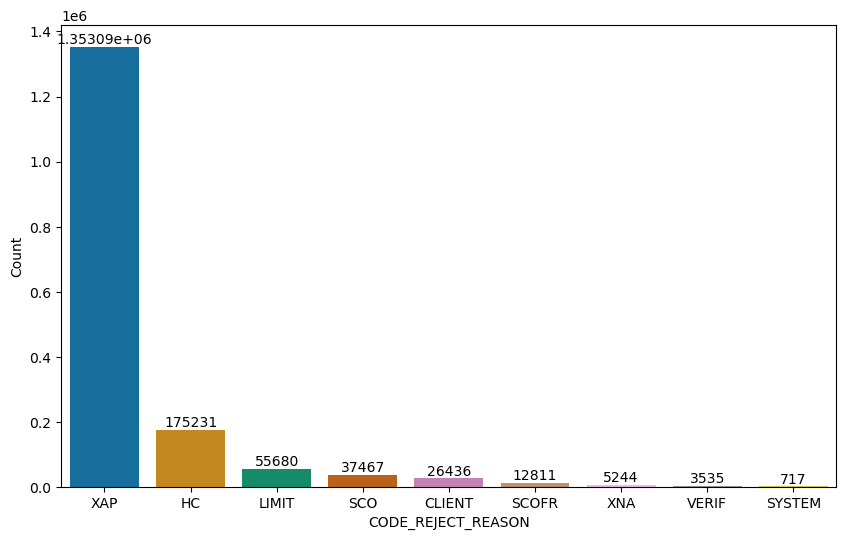

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CODE_REJECT_REASON', y='Count', data=df_t_pa_reject, palette="colorblind")
ax.bar_label(ax.containers[0])
plt.show()

### **Penjelasan Kode Penolakan Aplikasi Pinjaman**

1. **XAP (1,353,093)**  
   - **XAP** biasanya merupakan kode yang menunjukkan **alasan penolakan yang tidak terdefinisi** atau tidak dapat dipastikan.  
   - Jumlah **1,353,093** menunjukkan banyaknya aplikasi yang ditolak dengan alasan yang tidak tercatat secara spesifik dalam sistem atau alasan yang tidak diketahui.  
   - Ini bisa terjadi jika peminjam tidak memberikan alasan yang jelas atau alasan penolakan yang tidak tercatat dalam data.

2. **HC (175,231)**  
   - **HC** mengacu pada **High Credit** atau skor kredit yang terlalu tinggi untuk pinjaman yang diminta.  
   - Jumlah **175,231** menunjukkan banyaknya aplikasi yang ditolak karena skor kredit atau profil keuangan peminjam yang dianggap terlalu tinggi atau berisiko dalam konteks kebijakan pinjaman lembaga tersebut.

3. **LIMIT (55,680)**  
   - **LIMIT** menunjukkan bahwa aplikasi ditolak karena **batas kredit** yang telah tercapai.  
   - Jumlah **55,680** menunjukkan banyaknya aplikasi yang ditolak karena peminjam telah mencapai atau melebihi batas pinjaman yang dapat diberikan oleh lembaga keuangan.

4. **SCO (37,467)**  
   - **SCO** berarti **Skor Kredit (Credit Score)** yang tidak memenuhi persyaratan.  
   - Jumlah **37,467** menunjukkan aplikasi yang ditolak karena skor kredit peminjam dianggap tidak memadai untuk memenuhi syarat pinjaman.

5. **CLIENT (26,436)**  
   - **CLIENT** menunjukkan penolakan yang terkait dengan **status atau profil klien**.  
   - Jumlah **26,436** menunjukkan aplikasi yang ditolak karena alasan terkait status peminjam yang tidak memenuhi syarat, misalnya, masalah dengan identitas atau data pribadi.

6. **SCOFR (12,811)**  
   - **SCOFR** kemungkinan merujuk pada **skor kredit yang tidak terverifikasi** atau **skor yang tidak valid** dalam sistem.  
   - Jumlah **12,811** menunjukkan aplikasi yang ditolak karena skor kredit peminjam tidak valid atau tidak dapat diverifikasi oleh sistem.

7. **XNA (5,244)**  
   - **XNA** biasanya berarti **Tidak Tersedia (Not Available)** atau **data yang tidak tersedia** terkait alasan penolakan.  
   - Jumlah **5,244** menunjukkan aplikasi yang ditolak karena alasan yang tidak jelas atau tidak tersedia dalam sistem.

8. **VERIF (3,535)**  
   - **VERIF** mengacu pada masalah dengan **verifikasi data**.  
   - Jumlah **3,535** menunjukkan aplikasi yang ditolak karena peminjam gagal melewati proses verifikasi informasi, seperti alamat, identitas, atau informasi lainnya.

9. **SYSTEM (717)**  
   - **SYSTEM** berarti penolakan yang terjadi karena **masalah teknis atau sistem** yang menyebabkan aplikasi tidak dapat diproses dengan benar.  
   - Jumlah **717** menunjukkan aplikasi yang ditolak akibat masalah yang berkaitan dengan sistem atau kesalahan teknis saat memproses aplikasi.

In [63]:
df_pa_good = df_previous_application['NAME_GOODS_CATEGORY'].value_counts()
df_t_pa_good = pd.DataFrame({
    "CODE_REJECT_REASON": df_pa_good.keys(),
    "Count": df_pa_good.values,
    "Percentage": (df_pa_good.values/sum(df_pa_good.values)*100).round(2)
})
df_t_pa_good

,CODE_REJECT_REASON,Count,Percentage
0,XNA,950809,56.93
1,Mobile,224708,13.45
2,Consumer Electronics,121576,7.28
3,Computers,105769,6.33
4,Audio/Video,99441,5.95
5,Furniture,53656,3.21
6,Photo / Cinema Equipment,25021,1.50
7,Construction Materials,24995,1.50
8,Clothing and Accessories,23554,1.41
9,Auto Accessories,7381,0.44


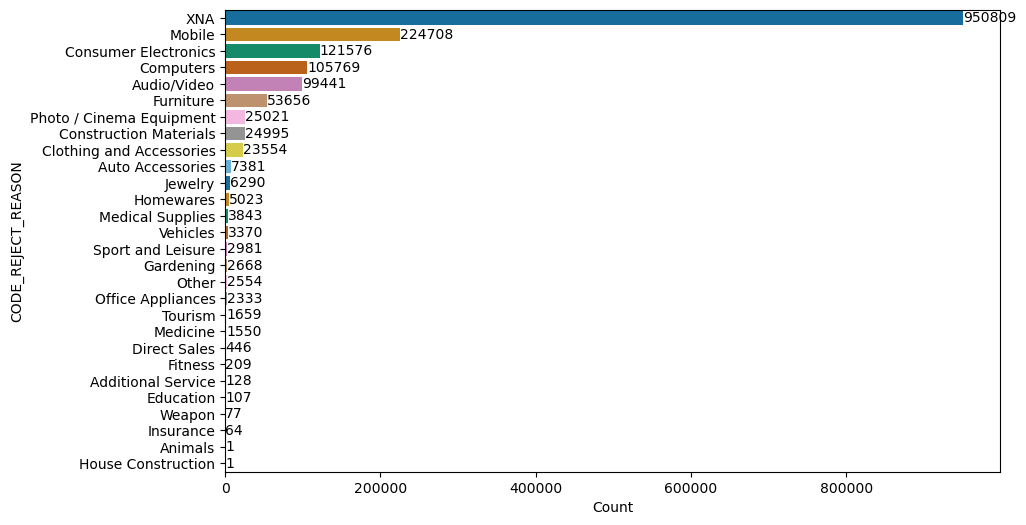

In [66]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='CODE_REJECT_REASON', data=df_t_pa_good, palette="colorblind")
ax.bar_label(ax.containers[0])
plt.show()

### **Penjelasan Kategori Barang yang Dibeli dengan Pinjaman**

1. **XNA (950,809)**  
   - **XNA** menunjukkan **kategori yang tidak diketahui** atau **tidak terdefinisi** dalam sistem.  
   - Jumlah **950,809** menunjukkan banyaknya aplikasi pinjaman yang tidak menyebutkan kategori barang yang dibeli atau tidak ada data kategori yang tercatat.

2. **Mobile (224,708)**  
   - **Mobile** mengacu pada pinjaman yang digunakan untuk membeli **ponsel** atau perangkat mobile.  
   - Jumlah **224,708** menunjukkan aplikasi pinjaman yang digunakan untuk membeli ponsel atau perangkat mobile lainnya.

3. **Consumer Electronics (121,576)**  
   - **Consumer Electronics** merujuk pada **barang elektronik konsumen**, seperti televisi, radio, kamera digital, dan perangkat elektronik lainnya.  
   - Jumlah **121,576** menunjukkan aplikasi pinjaman untuk membeli barang-barang elektronik konsumen.

4. **Computers (105,769)**  
   - **Computers** berarti pinjaman yang digunakan untuk membeli **komputer**, baik laptop, desktop, atau perangkat komputer lainnya.  
   - Jumlah **105,769** menunjukkan aplikasi pinjaman untuk membeli komputer.

5. **Audio/Video (99,441)**  
   - **Audio/Video** mengacu pada pembelian barang **audio dan video**, seperti pemutar musik, sistem suara, dan perangkat video.  
   - Jumlah **99,441** menunjukkan aplikasi pinjaman untuk membeli barang di kategori audio dan video.

6. **Furniture (53,656)**  
   - **Furniture** berarti pinjaman yang digunakan untuk membeli **perabotan rumah tangga**, seperti meja, kursi, lemari, dan sebagainya.  
   - Jumlah **53,656** menunjukkan aplikasi pinjaman yang digunakan untuk membeli perabot rumah tangga.

7. **Photo / Cinema Equipment (25,021)**  
   - **Photo / Cinema Equipment** berarti pinjaman digunakan untuk membeli **peralatan fotografi atau sinematografi**, seperti kamera profesional, peralatan studio, dan perlengkapan terkait.  
   - Jumlah **25,021** menunjukkan aplikasi pinjaman untuk membeli peralatan foto atau sinema.

8. **Construction Materials (24,995)**  
   - **Construction Materials** menunjukkan pinjaman yang digunakan untuk membeli **material bangunan**, seperti semen, batu bata, atau bahan bangunan lainnya.  
   - Jumlah **24,995** menunjukkan aplikasi pinjaman untuk membeli bahan bangunan.

9. **Clothing and Accessories (23,554)**  
   - **Clothing and Accessories** berarti pinjaman digunakan untuk membeli **pakaian dan aksesori**.  
   - Jumlah **23,554** menunjukkan aplikasi pinjaman yang digunakan untuk membeli pakaian atau aksesori.

10. **Auto Accessories (7,381)**  
    - **Auto Accessories** mengacu pada pinjaman yang digunakan untuk membeli **aksesori kendaraan**.  
    - Jumlah **7,381** menunjukkan aplikasi pinjaman untuk membeli aksesori mobil atau kendaraan.

11. **Jewelry (6,290)**  
    - **Jewelry** berarti pinjaman digunakan untuk membeli **perhiasan**.  
    - Jumlah **6,290** menunjukkan aplikasi pinjaman untuk membeli perhiasan.

12. **Homewares (5,023)**  
    - **Homewares** mengacu pada pembelian **barang-barang rumah tangga** seperti peralatan dapur, dekorasi rumah, dan lainnya.  
    - Jumlah **5,023** menunjukkan aplikasi pinjaman yang digunakan untuk membeli barang-barang rumah tangga.

13. **Medical Supplies (3,843)**  
    - **Medical Supplies** berarti pinjaman digunakan untuk membeli **perlengkapan medis**, seperti obat-obatan, alat kesehatan, atau kebutuhan medis lainnya.  
    - Jumlah **3,843** menunjukkan aplikasi pinjaman untuk membeli perlengkapan medis.

14. **Vehicles (3,370)**  
    - **Vehicles** mengacu pada pinjaman yang digunakan untuk membeli **kendaraan** seperti mobil, motor, atau jenis kendaraan lainnya.  
    - Jumlah **3,370** menunjukkan aplikasi pinjaman untuk membeli kendaraan.

15. **Sport and Leisure (2,981)**  
    - **Sport and Leisure** berarti pinjaman digunakan untuk membeli **peralatan olahraga dan rekreasi**, seperti sepeda, alat fitness, dan perlengkapan olahraga lainnya.  
    - Jumlah **2,981** menunjukkan aplikasi pinjaman untuk membeli peralatan olahraga dan rekreasi.

16. **Gardening (2,668)**  
    - **Gardening** menunjukkan pinjaman yang digunakan untuk membeli barang-barang untuk **berkebun**, seperti tanaman, alat berkebun, dan perlengkapan taman.  
    - Jumlah **2,668** menunjukkan aplikasi pinjaman untuk berkebun.

17. **Other (2,554)**  
    - **Other** merujuk pada kategori **lainnya**, yang mencakup barang atau produk yang tidak masuk dalam kategori yang sudah disebutkan.  
    - Jumlah **2,554** menunjukkan aplikasi pinjaman untuk tujuan yang tidak terdefinisi atau untuk barang lain yang tidak tercatat dalam kategori yang ada.

18. **Office Appliances (2,333)**  
    - **Office Appliances** berarti pinjaman digunakan untuk membeli **peralatan kantor**, seperti mesin fotokopi, printer, dan perangkat kantor lainnya.  
    - Jumlah **2,333** menunjukkan aplikasi pinjaman untuk membeli peralatan kantor.

19. **Tourism (1,659)**  
    - **Tourism** mengacu pada pinjaman yang digunakan untuk **tujuan wisata**, seperti perjalanan atau liburan.  
    - Jumlah **1,659** menunjukkan aplikasi pinjaman untuk tujuan wisata.

20. **Medicine (1,550)**  
    - **Medicine** berarti pinjaman digunakan untuk membeli **obat-obatan** atau produk medis lainnya.  
    - Jumlah **1,550** menunjukkan aplikasi pinjaman untuk membeli obat atau produk medis.

21. **Direct Sales (446)**  
    - **Direct Sales** merujuk pada pinjaman yang digunakan untuk membeli barang melalui **penjualan langsung**, biasanya di luar pengecer atau toko.  
    - Jumlah **446** menunjukkan aplikasi pinjaman untuk tujuan penjualan langsung.

22. **Fitness (209)**  
    - **Fitness** berarti pinjaman digunakan untuk membeli barang atau peralatan **fitness** atau kebugaran, seperti alat olahraga pribadi.  
    - Jumlah **209** menunjukkan aplikasi pinjaman untuk membeli peralatan fitness.

23. **Additional Service (128)**  
    - **Additional Service** berarti pinjaman digunakan untuk membayar **layanan tambahan**, seperti layanan perawatan atau konsultasi.  
    - Jumlah **128** menunjukkan aplikasi pinjaman untuk tujuan layanan tambahan.

24. **Education (107)**  
    - **Education** berarti pinjaman digunakan untuk biaya **pendidikan**, seperti biaya kuliah atau kursus.  
    - Jumlah **107** menunjukkan aplikasi pinjaman untuk tujuan pendidikan.

25. **Weapon (77)**  
    - **Weapon** menunjukkan pinjaman yang digunakan untuk membeli **senjata**.  
    - Jumlah **77** menunjukkan aplikasi pinjaman untuk membeli senjata.

26. **Insurance (64)**  
    - **Insurance** merujuk pada pinjaman yang digunakan untuk membeli **asuransi**.  
    - Jumlah **64** menunjukkan aplikasi pinjaman untuk membeli produk asuransi.

27. **Animals (1)**  
    - **Animals** berarti pinjaman digunakan untuk membeli **hewan**.  
    - Jumlah **1** menunjukkan aplikasi pinjaman untuk membeli hewan.

28. **House Construction (1)**  
    - **House Construction** menunjukkan pinjaman yang digunakan untuk **membangun rumah**.  
    - Jumlah **1** menunjukkan aplikasi pinjaman untuk tujuan pembangunan rumah.

In [67]:
round(df_previous_application.describe(), 2)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.0,1284699.00,1670214.00,1670214.00,774370.00,...,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.4,227847.28,12.48,1.00,0.08,...,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.5,315396.56,3.33,0.06,0.11,...,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.9,0.00,0.00,0.00,-0.00,...,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.0,50841.00,10.00,1.00,0.00,...,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.0,112320.00,12.00,1.00,0.05,...,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.0,234000.00,15.00,1.00,0.11,...,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.14,6905160.00,6905160.00,3060045.0,6905160.00,23.00,1.00,1.00,...,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


In [3]:
df_sample_submission = pd.read_csv('home-credit-default-risk/sample_submission.csv')
df_sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [5]:
df_sample_submission['TARGET'].value_counts()

TARGET
0.5    48744
Name: count, dtype: int64

In [6]:
df_train = pd.read_csv('home-credit-default-risk/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [10]:
df_train_target = df_train['TARGET'].value_counts()
df_train_target_table = pd.DataFrame({
    "CODE_REJECT_REASON": df_train_target.keys(),
    "Count": df_train_target.values,
    "Percentage": (df_train_target.values/sum(df_train_target.values)*100).round(2)
})
df_train_target_table

,CODE_REJECT_REASON,Count,Percentage
0,0,282686,91.93
1,1,24825,8.07
